# Exercises - GEO4902-02 - Data Assimilation

Kjersti Stangeland, Fall 2024

# Exercise 02-02 -  Analyse the impact of the surface data assimilation 

In [37]:
import xarray as xr
import numpy as np
import cartopy as cy
from matplotlib import pyplot as plt
import cmocean.cm as cmo

- It follows the same logic as Exercise 1 but this time for the (land-)surface model.

- Utilize the script to plot the impact on point forecasts. That means plot 2 or more forecasts in one figure. Use also different variables. 

#### Fill in the dates and hours for the exercise

In [38]:
year =  '2023'
day  =  '07'
month = '08'

hour_1  ='12'
hour_2  ='15'

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_det_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_det_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [39]:
def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    x=int(x)
    y=int(y)
   
    return (x,y)

In [40]:
[y_loc,x_loc] = findindex(forecast_1['latitude'],forecast_1['longitude'],78.24,15.46) # For example for Longyearbyen

/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_88224/4093572236.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_88224/4093572236.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)


#### For example temperature

In [41]:
t2m_point_forecast_1 = forecast_1['air_temperature_2m'].isel(height1=0, y=y_loc, x=x_loc)
t2m_point_forecast_2 = forecast_2['air_temperature_2m'].isel(height1=0, y=y_loc, x=x_loc)

In [42]:
# Choosing two other variables
wind_point_forecast_1 = forecast_1['wind_speed'].isel(height7=0, y=y_loc, x=x_loc)
wind_point_forecast_2 = forecast_2['wind_speed'].isel(height7=0, y=y_loc, x=x_loc)

specific_humidity_point_forecast_1 = forecast_1['specific_humidity_2m'].isel(height1=0, y=y_loc, x=x_loc)
specific_humidity_point_forecast_2 = forecast_2['specific_humidity_2m'].isel(height1=0, y=y_loc, x=x_loc)

Text(0.5, 0.98, 'Point forecast, bottom model layer')

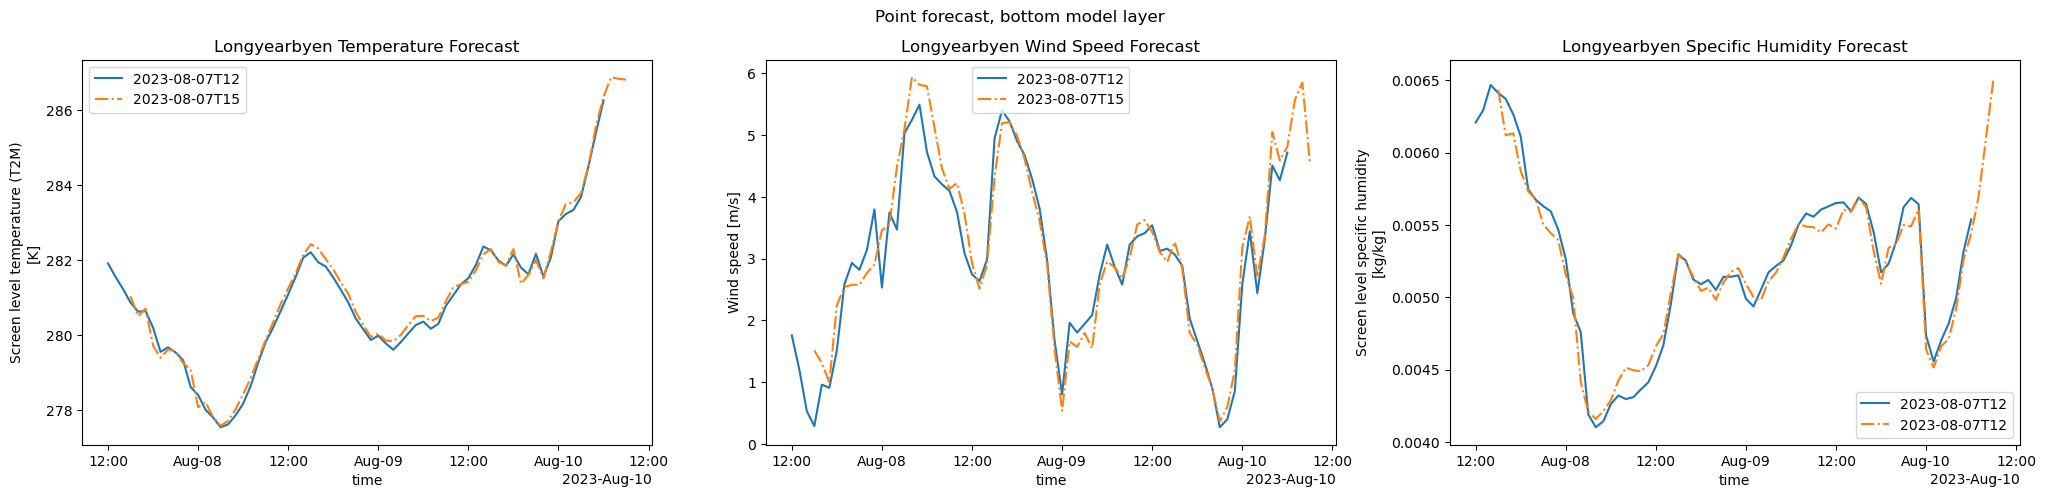

In [43]:
fig, ax = plt.subplots(1,3, figsize=(25,5))

t2m_point_forecast_1.plot.line(ax=ax[0], x='time', linestyle='-', label=(np.datetime_as_string(t2m_point_forecast_1.time.isel(time=0), unit='h')))
t2m_point_forecast_2.plot.line(ax=ax[0],x='time', linestyle='-.', label=(np.datetime_as_string(t2m_point_forecast_2.time.isel(time=0), unit='h')))

wind_point_forecast_1.plot.line(ax=ax[1], x='time', linestyle='-', label=(np.datetime_as_string(t2m_point_forecast_1.time.isel(time=0), unit='h')))
wind_point_forecast_2.plot.line(ax=ax[1], x='time', linestyle='-.', label=(np.datetime_as_string(t2m_point_forecast_2.time.isel(time=0), unit='h')))

specific_humidity_point_forecast_1.plot.line(ax=ax[2], x='time', linestyle='-', label=(np.datetime_as_string(t2m_point_forecast_1.time.isel(time=0), unit='h')))
specific_humidity_point_forecast_2.plot.line(ax=ax[2], x='time', linestyle='-.', label=(np.datetime_as_string(t2m_point_forecast_1.time.isel(time=0), unit='h')))

ax[0].set_title("Longyearbyen Temperature Forecast")
ax[1].set_title("Longyearbyen Wind Speed Forecast")
ax[2].set_title("Longyearbyen Specific Humidity Forecast")

ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.suptitle('Point forecast, bottom model layer')

__Answers__:
- The assimilation for the temperature point forecast predicts lower temperatures around noon the next day, with a difference of 1 degree. 
- The wind speed aligns quite well, with some deviations towards the end of the forecast. 
- The specific humidity forecast also aligns well between the background forecast (12UTC) and the rapid update cycling (15UTC) which has observations incorporated. The largest deviations happens towards the end of the forecast. WHY?
- On the other side, not looking at the difference between the two, I notice that when there are higher temperatures forecasted, the specific humidity is also forecasted to rise. Is it because it expects there to be a higher humidity as the air can hold more moisture, or maybe expected more incoming solar radiation and more latent heat flux? Or more photosynthesis at the surface, giving a source of humidity?

### Plot one forecast on a map

- Utilize the script to plot a 2D-map of the impact of the data assimilation, this means the difference between the background xB and the analysis xA. In order to find the background think about what goes into the data assimilation procedure from the previous forecast? 
- Plot maps for different variables (levels are all surface (“screen”) levels).
- Describe and interpret the difference between the results in Exercise 1


In [44]:
# Difference between background and analysis
diff_temp = (forecast_1['air_temperature_2m'].isel(height1=0, time = 3) - forecast_2['air_temperature_2m'].isel(height1=0, time = 0))
diff_specific= forecast_1['specific_humidity_2m'].isel(height1=0, time = 3) - forecast_2['specific_humidity_2m'].isel(height1=0, time = 0)
diff_windspeed = forecast_1['wind_speed'].isel(height7=0, time=3)  - forecast_2['wind_speed'].isel(height7=0, time=0)

Text(0.5, 0.7, 'Xb-xa')

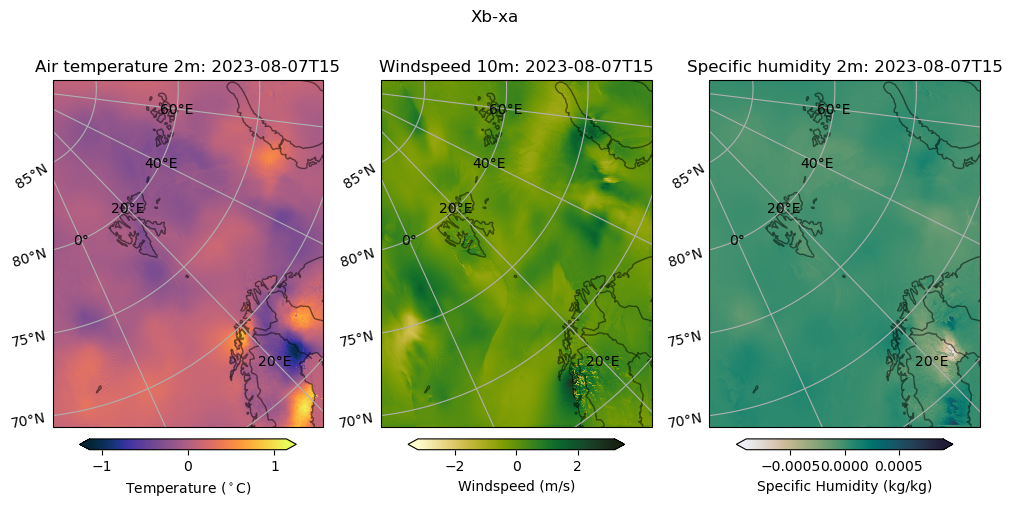

In [45]:
#lat0=78.24; lon0=15.46

projection = cy.crs.LambertConformal(central_longitude =forecast_1.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =forecast_1.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = forecast_1.projection_lambert.standard_parallel)

fig, ax = plt.subplots(1,3, subplot_kw={'projection':projection}, figsize=[10, 8])

# plot cosmetics
for a in ax.flat:
    a.add_feature(cy.feature.COASTLINE, alpha=0.5)
    a.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = a.gridlines(draw_labels=True)
    gl.top_labels=False
    gl.right_labels=False
    #a.set_extent([lon0-2, lon0+6, lat0-5, lat0+8], cy.crs.PlateCarree())

timestamp = np.datetime_as_string(forecast_1.time.isel(time=3), unit="h")

diff_temp.plot(ax=ax[0], x='longitude', y='latitude', transform=cy.crs.PlateCarree(), cmap=cmo.thermal, extend='both',  cbar_kwargs={'orientation':'horizontal','label':'Temperature ($^\circ$C)', 'shrink':0.8, 'pad':0.015})
ax[0].set(title= f'Air temperature 2m: {timestamp}')

diff_windspeed.plot(ax=ax[1], x='longitude', y='latitude', transform=cy.crs.PlateCarree(), cmap=cmo.speed, extend='both',  cbar_kwargs={'orientation':'horizontal','label':'Windspeed (m/s)', 'shrink':0.8, 'pad':0.015})
ax[1].set(title= f'Windspeed 10m: {timestamp}')

diff_specific.plot(ax=ax[2], x='longitude', y='latitude', transform=cy.crs.PlateCarree(), cmap=cmo.rain, extend='both' ,cbar_kwargs={'orientation':'horizontal','label':'Specific Humidity (kg/kg)', 'shrink':0.8, 'pad':0.015})
ax[2].set(title= f'Specific humidity 2m: {timestamp}')

fig.tight_layout()
fig.suptitle('Xb-xa', y=0.7)

__Answers__:

- In comparison to exercise 1, the difference between the background and the analysis is smaller for the surface/screen variables. (Question: is windspeed at 10m still seen as a screen variable just because it is not modelled at a model-level?)
- The smaller difference between background and analysis in the surface case above (in comparison to the model levels in ex. 1) could maybe be due to a more precise forecasting of surface variables rather than model levels, but I do not know why..